Library imports

In [1]:
import rasterio
import seaborn as sns
from shapely import wkt
import pandas as pd
from numpy import nan as np_nan
from os import makedirs

import utilities as utils

#### Loads the raw datacube

In [2]:
data_aus = utils.load_dataset('data/SRI-DATACUBE/datacube_sri_aus.csv')
data_aus.head()
data_uscan = utils.load_dataset('data/SRI-DATACUBE/datacube_sri_uscan.csv')
data_uscan.head()

s2_cell_id                            s2_cell_center  \
0  5.407508e+18   (-52.77455720096285, 47.79014133427333)   
1  5.407508e+18  (-52.79668480860249, 47.775641586895475)   
2  5.407510e+18    (-52.81427963585849, 47.7365941993138)   
3  5.407511e+18  (-52.787679290472134, 47.72654503197568)   
4  5.407511e+18  (-52.765573065990225, 47.74102844443887)   

                                        s2_cell_poly  \
0  POLYGON ((-52.75017029782352 47.79235272322585...   
1  POLYGON ((-52.772308984340135 47.7778586350250...   
2  POLYGON ((-52.789928484457185 47.7388146935553...   
3  POLYGON ((-52.763330665519334 47.7287576848285...   
4  POLYGON ((-52.74121339274432 47.7432354490161,...   

   GeophysicsLAB_USCanada_resampled  USCanada_Moho_resampled  \
0                        167.458481                36.951820   
1                        167.485397                36.920330   
2                        167.494980                36.847523   
3                        167.476105                36.836487   
4                        167.444885                36.853416   

   GeophysicsSatelliteGravity_ShapeIndex_USCanada_resampled  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   GeophysicsGravity_USCanada_resampled  \
0                            -14.635756   
1                            -14.081331   
2                            -12.938763   
3                            -13.922650   
4                            -14.739796   

   GeophysicsGravity_HGM_USCanada_resampled  \
0                                  0.000478   
1                                  0.000519   
2                                  0.000470   
3                                  0.000613   
4                                  0.000506   

   GeophysicsGravity_Up30km_HGM_USCanada_resampled  \
0                                         6.129842   
1                                         6.144084   
2                                         6.185924   
3                                         6.158608   
4                                         6.128949   

   GeophysicsMag_RTP_HGM_USCanada_resampled  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   

   USCanadaMagRTP_HGMDeepSources_resampled  \
0                                 0.000008   
1                                 0.000008   
2                                 0.000008   
3                                 0.000008   
4                                 0.000008   

   ShallowGravitySources_Worms_USCanada  DeepGravitySources_Worms_USCanada  \
0                              0.020289                           0.470099   
1                              0.010582                           0.447087   
2                              0.032890                           0.404188   
3                              0.013429                           0.411903   
4                              0.013779                           0.436983   

   ShallowMagSources_Worms_USCanada  DeepMagSources_Worms_USCanada  \
0                          3.231292                       0.852695   
1                          3.213096                       0.861847   
2                          3.197815                       0.896195   
3                          3.222383                       0.910071   
4                          3.243503                       0.902040   

   MVT_Deposit  MVT_Occurrence  MVT_DepositOccurrence  \
0        False           False                  False   
1        False           False                  False   
2        False           False                  F

#### Rename datacube columns from original dataset names to common names across continents

In [3]:
data_aus.rename({
    'GeophysicsLAB_Australia_resampled' : 'GeophysicsLAB',
    'GeophysicsMoho_Australia_resampled' : 'GeophysicsMoho',
    'GeophysicsSatelliteGravity_ShapeIndex_Australia_resampled' : 'GeophysicsSatelliteGravity_ShapeIndex',
    'GeophysicsGravity_Australia' : 'GeophysicsGravity', 
    'GeophysicsGravity_HGM_Australia' : 'GeophysicsGravity_HGM',
    'GeophysicsGravity_UpCont30km_Australia' : 'GeophysicsGravity_UpCont30km',
    'GeophysicsGravity_UpCont30km_HGM_Australia' : 'GeophysicsGravity_UpCont30km_HGM',
    'GeophysicsMagRTP_Australia' : 'GeophysicsMagRTP', 
    'GeophysicsMagRTP_DeepSources_Australia' : 'GeophysicsMagRTP_DeepSources',
    'GeophysicsMagRTP_VD_Australia' : 'GeophysicsMagRTP_VD',
    'GeophysicsMagRTP_HGM_Australia_resampled' : 'GeophysicsMagRTP_HGM',
    'GeophysicsMagRTP_HGMDeepSources_Australia_resampled' : 'GeophysicsMagRTP_HGMDeepSources',
    'ShallowGravitySources_Worms_Australia' : 'ShallowGravitySources_Worms',
    'DeepGravitySources_Worms_Australia' : 'DeepGravitySources_Worms',
    'ShallowMagSources_Worms_Australia' : 'ShallowMagSources_Worms', 
    'DeepMagSources_Worms_Australia' : 'DeepMagSources_Worms'
}, axis=1, inplace=True)
data_aus["Continent_Majority"] = "Oceania"

data_uscan.rename({
    'GeophysicsLAB_USCanada_resampled' : 'GeophysicsLAB', 
    'USCanada_Moho_resampled' : 'GeophysicsMoho',
    'GeophysicsSatelliteGravity_ShapeIndex_USCanada_resampled' : 'GeophysicsSatelliteGravity_ShapeIndex',
    'GeophysicsGravity_USCanada_resampled' : 'GeophysicsGravity',
    'GeophysicsGravity_HGM_USCanada_resampled' : 'GeophysicsGravity_HGM',
    'GeophysicsGravity_Up30km_USCanada_resampled' : 'GeophysicsGravity_UpCont30km',
    'GeophysicsGravity_Up30km_HGM_USCanada_resampled' : 'GeophysicsGravity_UpCont30km_HGM',
    'GeophysicsMag_RTP_USCanada_resampled' : 'GeophysicsMagRTP', 
    'USCanadaMagRTP_DeepSources_resampled' : 'GeophysicsMagRTP_DeepSources',
    'GeophysicsMag_RTP_VD_USCanada_resampled' : 'GeophysicsMagRTP_VD',
    'GeophysicsMag_RTP_HGM_USCanada_resampled' : 'GeophysicsMagRTP_HGM',
    'USCanadaMagRTP_HGMDeepSources_resampled' : 'GeophysicsMagRTP_HGMDeepSources',
    'ShallowGravitySources_Worms_USCanada' : 'ShallowGravitySources_Worms',
    'DeepGravitySources_Worms_USCanada' : 'DeepGravitySources_Worms', 
    'ShallowMagSources_Worms_USCanada' : 'ShallowMagSources_Worms',
    'DeepMagSources_Worms_USCanada' : 'DeepMagSources_Worms'
}, axis=1, inplace=True)
data_uscan["Continent_Majority"] = "North America"

#### Adds Longitude / Latitude columns

In [4]:
data_aus['Lat'] = data_aus['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[1][:-1]))
data_aus['Lng'] = data_aus['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[0][1:]))

data_uscan['Lat'] = data_uscan['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[1][:-1]))
data_uscan['Lng'] = data_uscan['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[0][1:]))

#### Selects the input variable data used for MVT WOE baseline

In [5]:
cols_dict = {
    's2_cell_poly' : None,                                      # Polygon with coordinates of the vertices
    'Continent_Majority' : None, 
    'GeophysicsLAB' : None,                                     # Depth to LAB
    'GeophysicsMoho' : None,                                    # Depth to Moho
    'GeophysicsSatelliteGravity_ShapeIndex' : None,             # Sattelite Gravity
    'GeophysicsGravity' : None,                                 # Gravity Bouger
    'GeophysicsGravity_HGM' : None,                             # Gravity HGM
    'GeophysicsGravity_UpCont30km_HGM' : None,                  # Gravity upward cont'd HGM
    'ShallowGravitySources_Worms' : None,                       # Gravity worms
    'DeepGravitySources_Worms' : None,                          # Gravity upward cont'd worms
    'GeophysicsMagRTP_HGM' : None,                              # Magnetic HGM
    'GeophysicsMagRTP_HGMDeepSources' : None,                   # Magnetic long-wavelength HGM
    'ShallowMagSources_Worms' : None,                           # Magnetic worms
    'DeepMagSources_Worms' : None,                              # Magnetic long-wavelength worms
    'MVT_Deposit' : None,
    'MVT_Occurrence' : None,
    'MVT_DepositOccurrence' : None,
    'MVT_DepositOccurrenceNeighbors' : None,
}
data_filtered_aus, cols = utils.extract_cols(data_aus, cols_dict)
data_filtered_uscan, cols = utils.extract_cols(data_uscan, cols_dict)

#### Selects target variable data used for WOE baseline and implements preprocessing on datacube
These columns are caclulated in the [SRI TA3 preprocessing repo](https://github.com/DARPA-CRITICALMAAS/sri-ta3-preprocess).

In [6]:
labels_filtered_aus = data_filtered_aus['MVT_DepositOccurrence'] # store target for later use
dep_filtered_aus = data_filtered_aus['MVT_Deposit'] # store split column for later use
geometry_filtered_aus = data_filtered_aus["s2_cell_poly"]  # store polygons for later use
continent_filtered_aus = data_filtered_aus["Continent_Majority"] # store continent for later use

labels_filtered_uscan = data_filtered_uscan['MVT_DepositOccurrence'] # store target for later use
dep_filtered_uscan = data_filtered_uscan['MVT_Deposit'] # store split column for later use
geometry_filtered_uscan = data_filtered_uscan["s2_cell_poly"]  # store polygons for later use
continent_filtered_uscan = data_filtered_uscan["Continent_Majority"] # store continent for later use

data_filtered_aus = data_filtered_aus.drop(columns=['s2_cell_poly', 'Continent_Majority', 'MVT_Deposit', 'MVT_Occurrence', 'MVT_DepositOccurrence', 'MVT_DepositOccurrenceNeighbors'])
data_filtered_uscan = data_filtered_uscan.drop(columns=['s2_cell_poly', 'Continent_Majority', 'MVT_Deposit', 'MVT_Occurrence', 'MVT_DepositOccurrence', 'MVT_DepositOccurrenceNeighbors'])
cols = cols[2:-4]

Clearly the dataset has MANY outliers, as reported in the paper

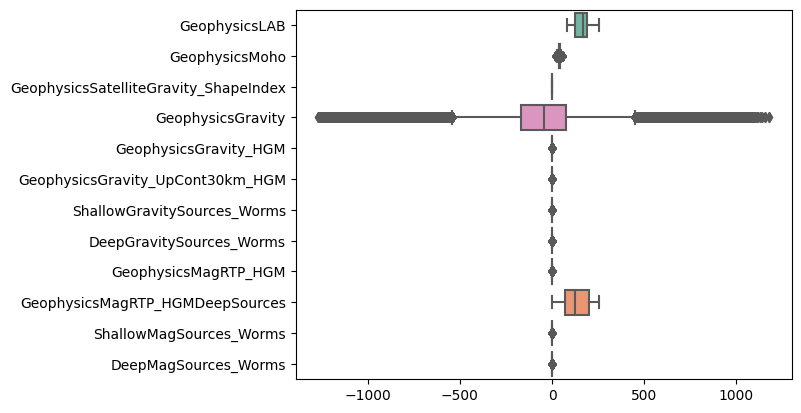

In [7]:
ax1 = sns.boxplot(data=data_filtered_aus, orient="h", palette="Set2")

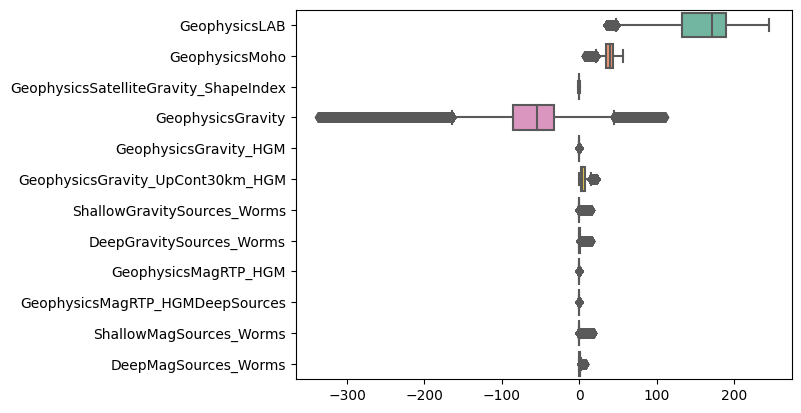

In [8]:
ax2 = sns.boxplot(data=data_filtered_uscan, orient="h", palette="Set2")

We can remove these outliers

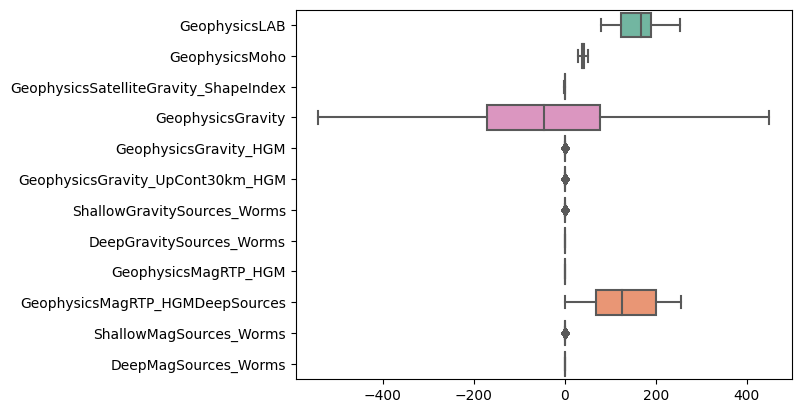

In [9]:
data_filtered_aus = utils.tukey_remove_outliers(data_filtered_aus)
ax1 = sns.boxplot(data=data_filtered_aus, orient="h", palette="Set2")

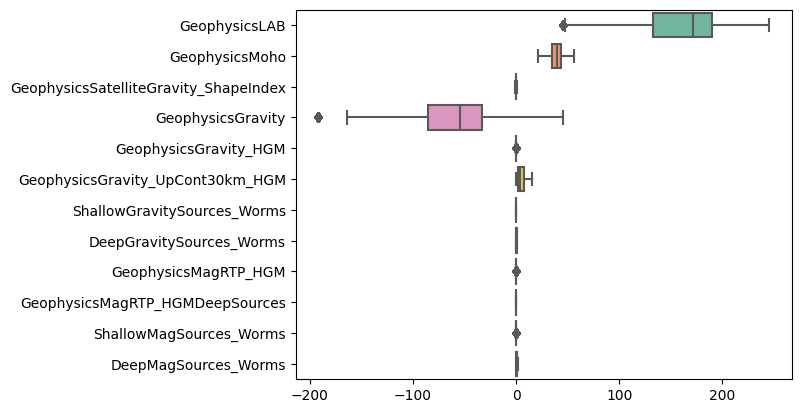

In [10]:
data_filtered_uscan = utils.tukey_remove_outliers(data_filtered_uscan)
ax2 = sns.boxplot(data=data_filtered_uscan, orient="h", palette="Set2")

There are also many NaNs in the data, these can be "imputed" with the mean value.

In [11]:
data_filtered_aus = utils.impute_nans(data_filtered_aus)
print(data_filtered_aus.isna().sum())


GeophysicsLAB                            0
GeophysicsMoho                           0
GeophysicsSatelliteGravity_ShapeIndex    0
GeophysicsGravity                        0
GeophysicsGravity_HGM                    0
GeophysicsGravity_UpCont30km_HGM         0
ShallowGravitySources_Worms              0
DeepGravitySources_Worms                 0
GeophysicsMagRTP_HGM                     0
GeophysicsMagRTP_HGMDeepSources          0
ShallowMagSources_Worms                  0
DeepMagSources_Worms                     0
dtype: int64


In [12]:
data_filtered_uscan = utils.impute_nans(data_filtered_uscan)
print(data_filtered_uscan.isna().sum())

GeophysicsLAB                            0
GeophysicsMoho                           0
GeophysicsSatelliteGravity_ShapeIndex    0
GeophysicsGravity                        0
GeophysicsGravity_HGM                    0
GeophysicsGravity_UpCont30km_HGM         0
ShallowGravitySources_Worms              0
DeepGravitySources_Worms                 0
GeophysicsMagRTP_HGM                     0
GeophysicsMagRTP_HGMDeepSources          0
ShallowMagSources_Worms                  0
DeepMagSources_Worms                     0
dtype: int64


Finally, it can be observed the above data is not "normalized", we should make features standard scores / z-scores

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


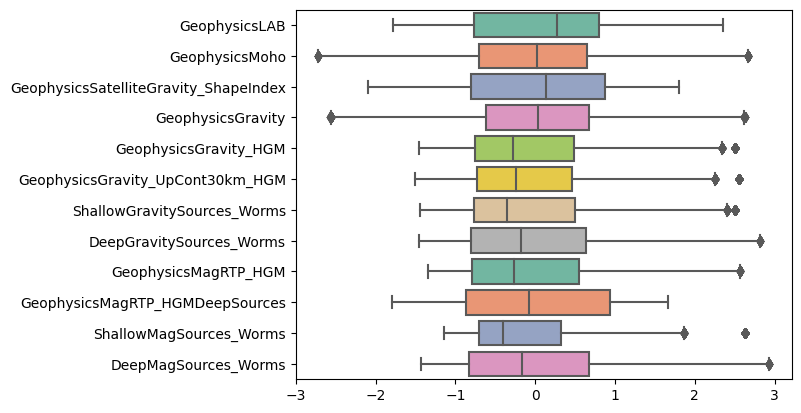

In [13]:
data_filtered_aus = utils.normalize_df(data_filtered_aus)
ax1 = sns.boxplot(data=data_filtered_aus, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


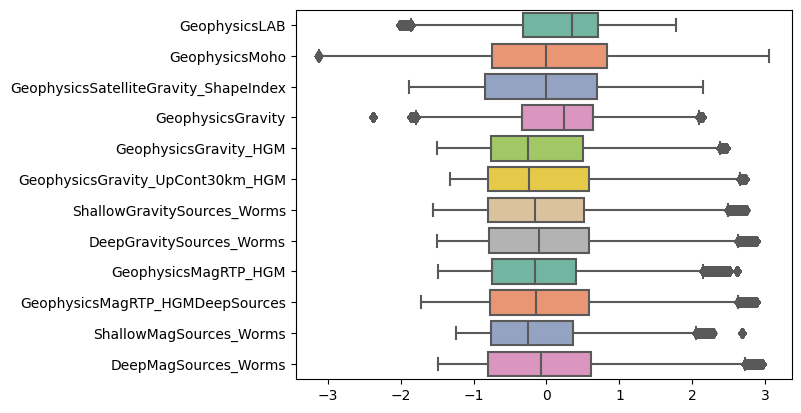

In [14]:
data_filtered_uscan = utils.normalize_df(data_filtered_uscan)
ax2 = sns.boxplot(data=data_filtered_uscan, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

#### Preprocessing completed, the data is prepared for output

In [15]:
data_filtered_aus["target"] = labels_filtered_aus
data_filtered_aus["H3_Geometry"] = geometry_filtered_aus
data_filtered_aus["Continent_Majority"] = continent_filtered_aus
data_filtered_aus["Training_MVT_Deposit"] = dep_filtered_aus

data_filtered_uscan["target"] = labels_filtered_uscan
data_filtered_uscan["H3_Geometry"] = geometry_filtered_uscan
data_filtered_uscan["Continent_Majority"] = continent_filtered_uscan
data_filtered_uscan["Training_MVT_Deposit"] = dep_filtered_uscan

# concatenates the separate datacubes into a single one
data_filtered = pd.concat((data_filtered_aus, data_filtered_uscan), ignore_index = True)
data_filtered.reset_index(drop=True, inplace=True)
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660532 entries, 0 to 5660531
Data columns (total 16 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   GeophysicsLAB                          float64
 1   GeophysicsMoho                         float64
 2   GeophysicsSatelliteGravity_ShapeIndex  float64
 3   GeophysicsGravity                      float64
 4   GeophysicsGravity_HGM                  float64
 5   GeophysicsGravity_UpCont30km_HGM       float64
 6   ShallowGravitySources_Worms            float64
 7   DeepGravitySources_Worms               float64
 8   GeophysicsMagRTP_HGM                   float64
 9   GeophysicsMagRTP_HGMDeepSources        float64
 10  ShallowMagSources_Worms                float64
 11  DeepMagSources_Worms                   float64
 12  target                                 bool   
 13  H3_Geometry                            object 
 14  Continent_Majority                     object 
 15

#### Generates tiff files for every column, separate for US/Canada and Australia

Rasterizing Oceania


/tmp/ipykernel_20001/2006906052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_datacube["H3_Geometry"] = continent_datacube["H3_Geometry"].apply(wkt.loads)
/tmp/ipykernel_20001/2006906052.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_datacube.rename({


Plotting - ['Depth to Lab', 'Depth to Moho', 'Satellite Gravity', 'Gravity Bouguer', 'Gravity HGM', 'Gravity upward-continued HGM', 'Gravity Worms', 'Gravity upward-continued worms', 'Magnetic HGM', 'Magnetic long-wavelength HGM', 'Magnetic worms', 'Magnetic long-wavelength worms', 'target', 'Training_MVT_Deposit']


  0%|          | 0/14 [00:00<?, ?it/s]

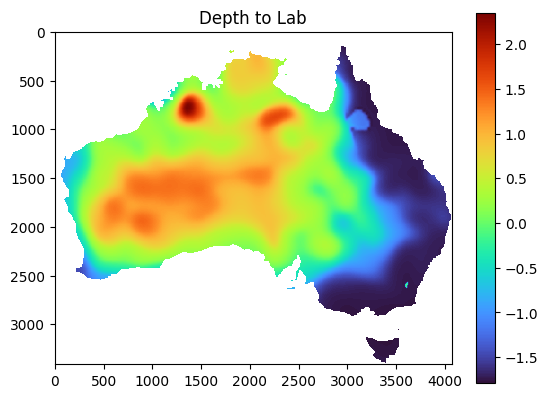

  7%|▋         | 1/14 [01:16<16:36, 76.63s/it]

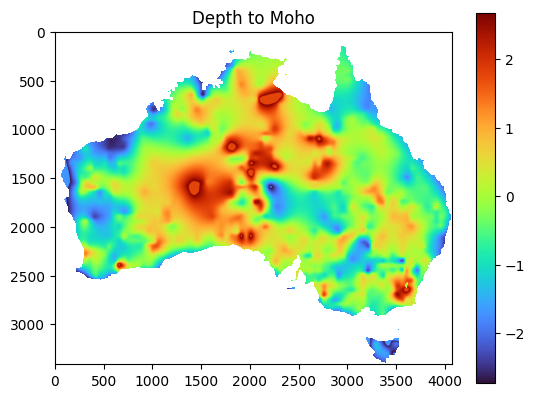

 14%|█▍        | 2/14 [02:46<16:52, 84.41s/it]

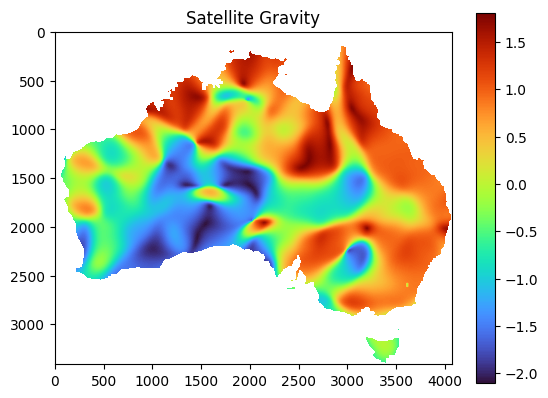

 21%|██▏       | 3/14 [04:16<15:55, 86.83s/it]

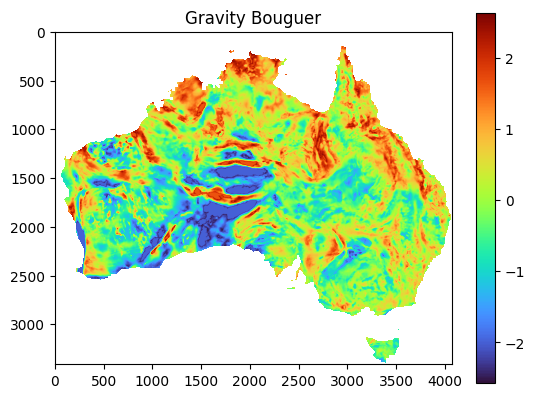

 29%|██▊       | 4/14 [05:33<13:50, 83.02s/it]

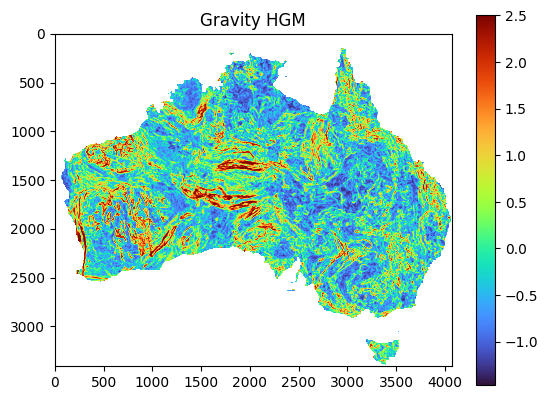

 36%|███▌      | 5/14 [06:50<12:08, 80.92s/it]

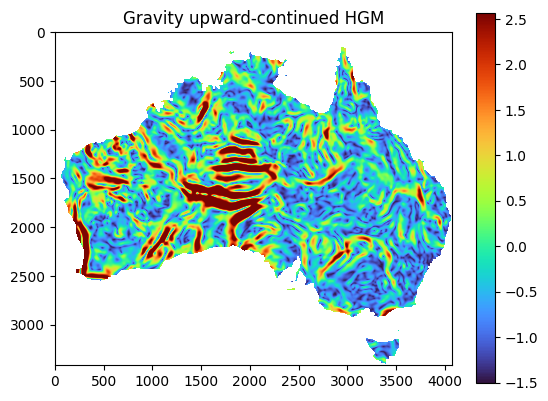

 43%|████▎     | 6/14 [08:07<10:36, 79.52s/it]

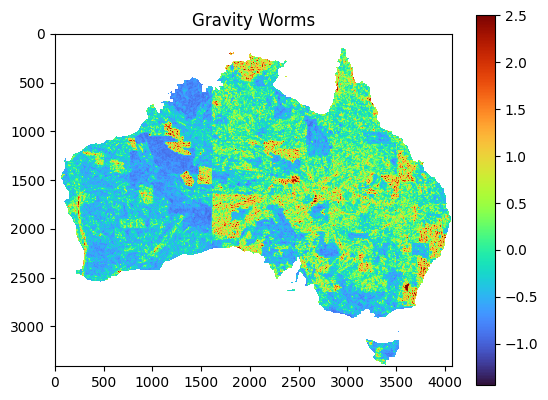

 50%|█████     | 7/14 [09:23<09:09, 78.56s/it]

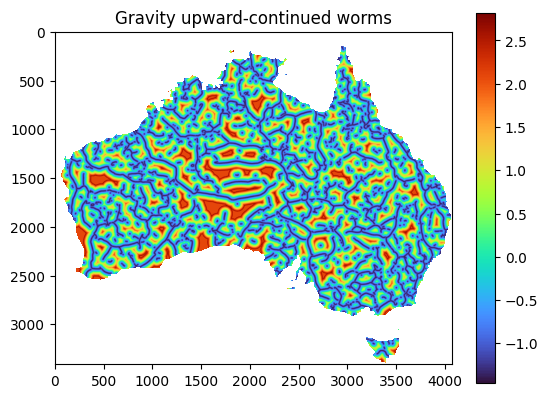

 57%|█████▋    | 8/14 [10:40<07:47, 77.93s/it]

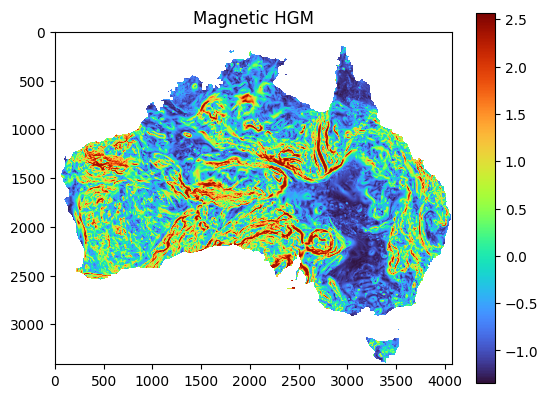

 64%|██████▍   | 9/14 [11:58<06:29, 77.83s/it]

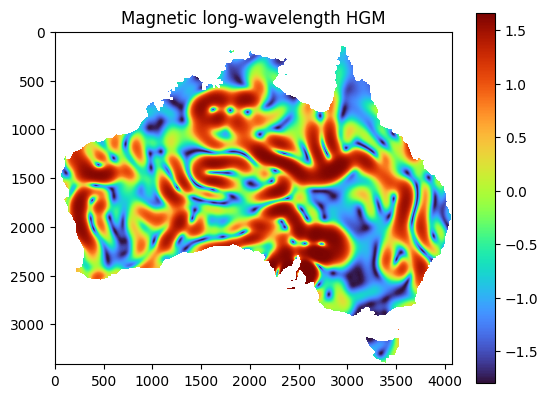

 71%|███████▏  | 10/14 [13:14<05:09, 77.44s/it]

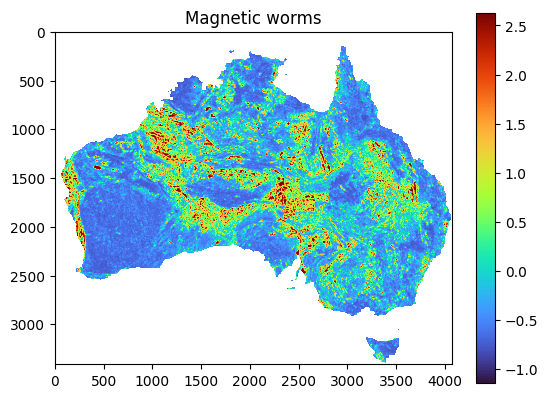

 79%|███████▊  | 11/14 [14:31<03:52, 77.38s/it]

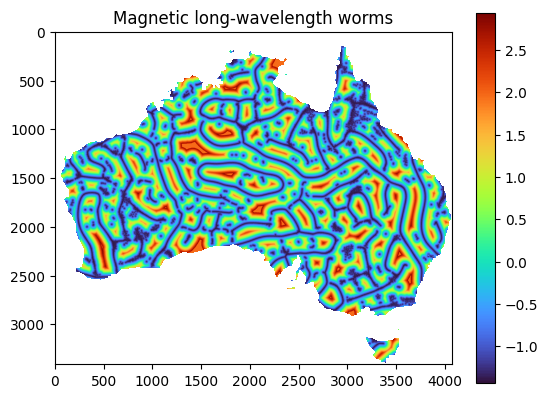

 86%|████████▌ | 12/14 [15:48<02:34, 77.23s/it]

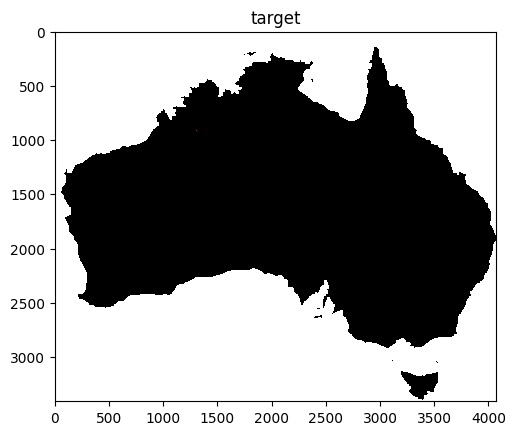

 93%|█████████▎| 13/14 [17:05<01:17, 77.09s/it]

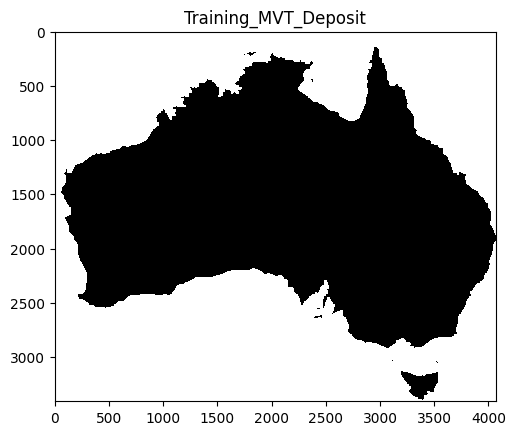

100%|██████████| 14/14 [18:22<00:00, 78.77s/it]


Outputting - ['Depth to Lab', 'Depth to Moho', 'Satellite Gravity', 'Gravity Bouguer', 'Gravity HGM', 'Gravity upward-continued HGM', 'Gravity Worms', 'Gravity upward-continued worms', 'Magnetic HGM', 'Magnetic long-wavelength HGM', 'Magnetic worms', 'Magnetic long-wavelength worms', 'Training_MVT_Deposit', 'target']


100%|██████████| 14/14 [18:50<00:00, 80.77s/it]


Rasterizing North America


/tmp/ipykernel_20001/2006906052.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_datacube["H3_Geometry"] = continent_datacube["H3_Geometry"].apply(wkt.loads)
/tmp/ipykernel_20001/2006906052.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  continent_datacube.rename({


Plotting - ['Depth to Lab', 'Depth to Moho', 'Satellite Gravity', 'Gravity Bouguer', 'Gravity HGM', 'Gravity upward-continued HGM', 'Gravity Worms', 'Gravity upward-continued worms', 'Magnetic HGM', 'Magnetic long-wavelength HGM', 'Magnetic worms', 'Magnetic long-wavelength worms', 'target', 'Training_MVT_Deposit']


  0%|          | 0/14 [00:00<?, ?it/s]

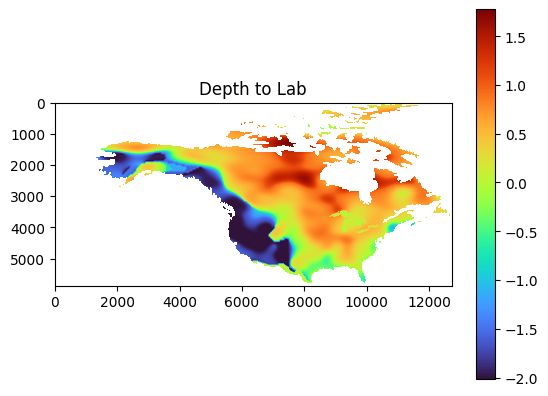

  7%|▋         | 1/14 [03:12<41:39, 192.25s/it]

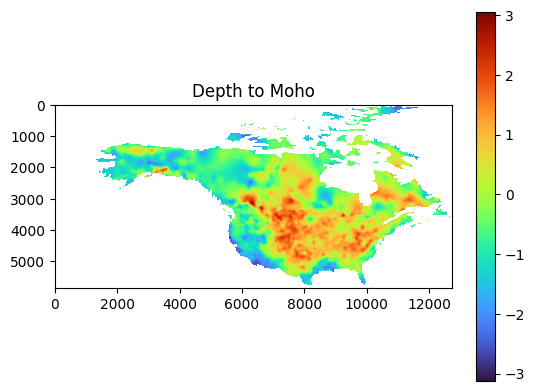

 14%|█▍        | 2/14 [06:25<38:34, 192.86s/it]

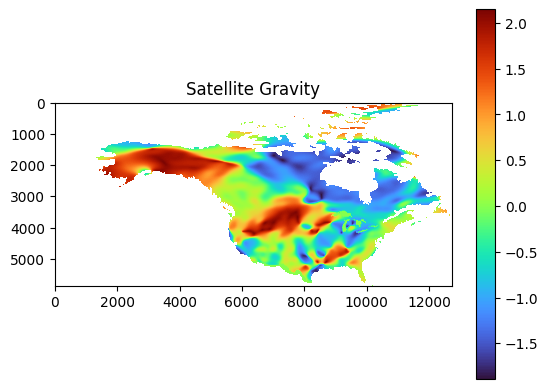

 21%|██▏       | 3/14 [09:37<35:14, 192.23s/it]

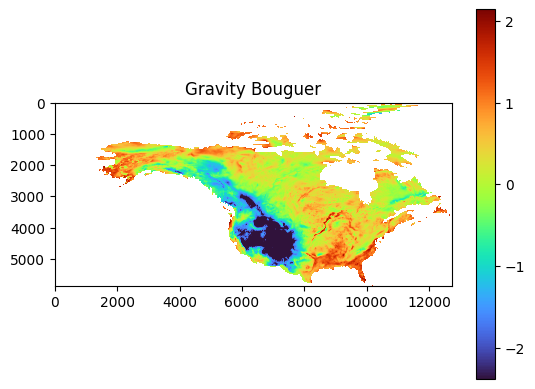

 29%|██▊       | 4/14 [12:48<31:58, 191.81s/it]

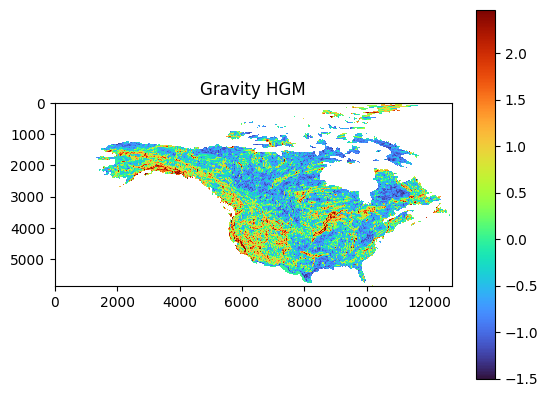

 36%|███▌      | 5/14 [15:58<28:41, 191.25s/it]

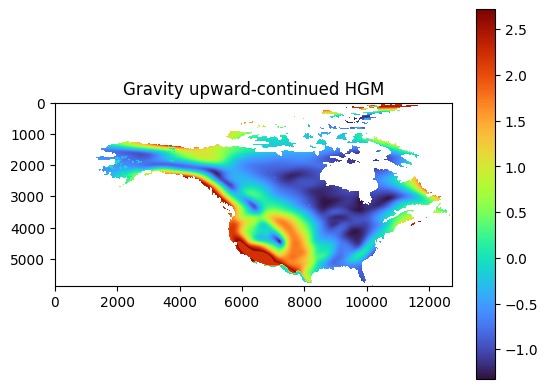

 43%|████▎     | 6/14 [19:08<25:27, 190.96s/it]

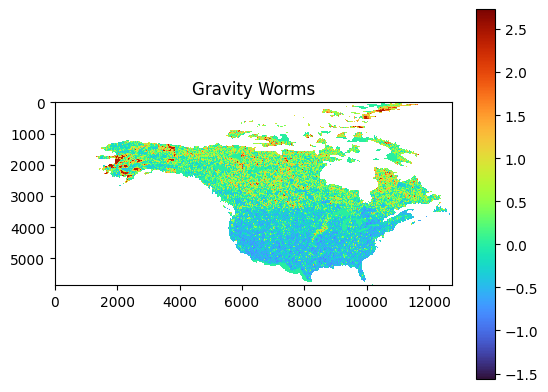

 50%|█████     | 7/14 [22:18<22:14, 190.67s/it]

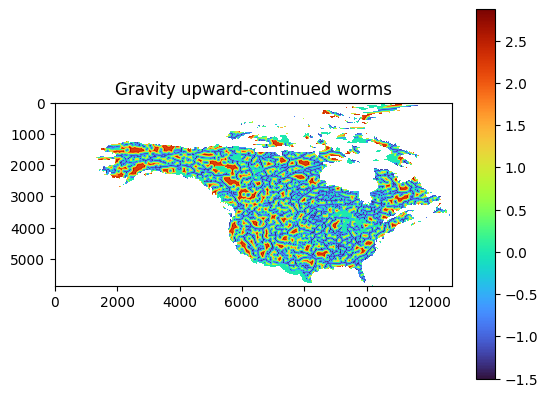

 57%|█████▋    | 8/14 [25:29<19:03, 190.55s/it]

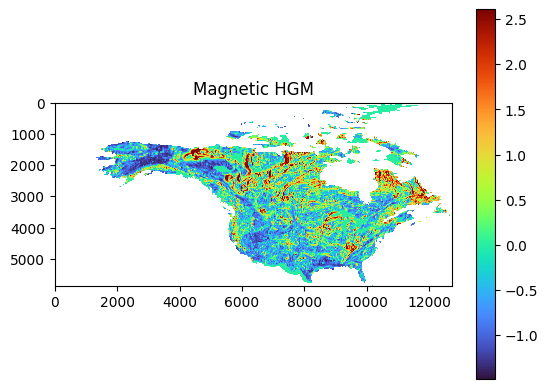

 64%|██████▍   | 9/14 [28:39<15:52, 190.58s/it]

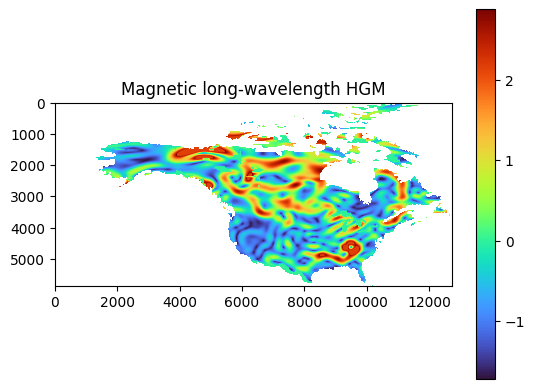

 71%|███████▏  | 10/14 [31:51<12:43, 190.96s/it]

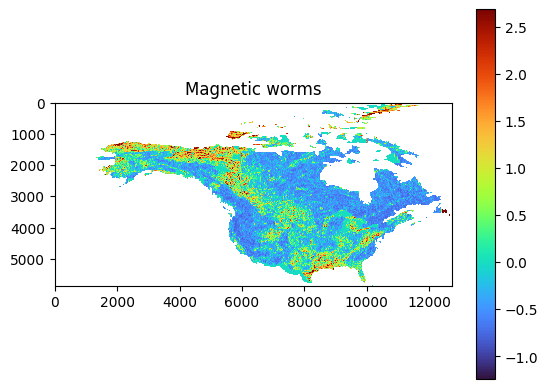

 79%|███████▊  | 11/14 [35:03<09:33, 191.18s/it]

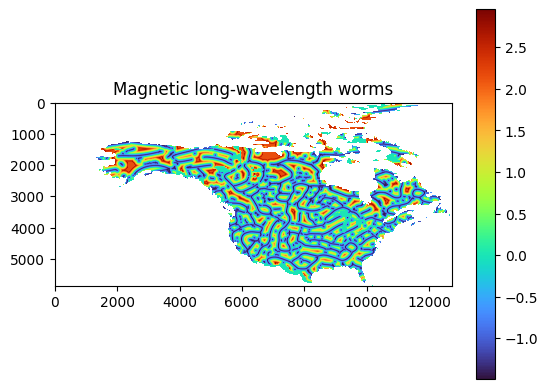

 86%|████████▌ | 12/14 [38:14<06:22, 191.22s/it]

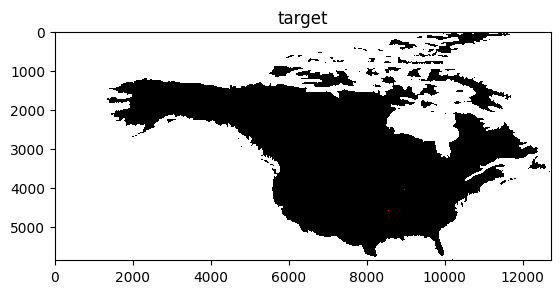

 93%|█████████▎| 13/14 [41:43<03:16, 196.62s/it]

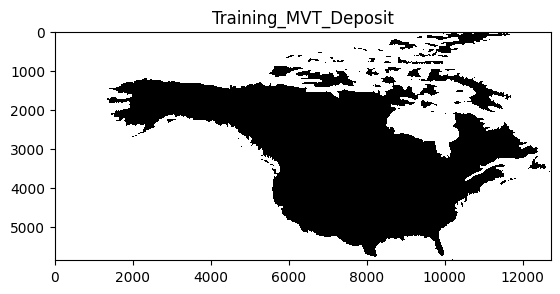

100%|██████████| 14/14 [45:29<00:00, 194.94s/it]


Outputting - ['Depth to Lab', 'Depth to Moho', 'Satellite Gravity', 'Gravity Bouguer', 'Gravity HGM', 'Gravity upward-continued HGM', 'Gravity Worms', 'Gravity upward-continued worms', 'Magnetic HGM', 'Magnetic long-wavelength HGM', 'Magnetic worms', 'Magnetic long-wavelength worms', 'Training_MVT_Deposit', 'target']


100%|██████████| 14/14 [46:23<00:00, 198.83s/it]


In [16]:
# sets location for output raster(s)
output_dir = './data/sri_rasters/'
makedirs(output_dir, exist_ok=True)

continents = {
    "Oceania": {'left':112.9, 'bottom':-43.6, 'right':153.6, 'top':-9.5},
    "North America": {'left':-179.8, 'bottom':24.5, 'right':-52.6, 'top':83.15}
}

resolution = (0.01, 0.01)

for idx, (continent, bounds) in enumerate(continents.items()):
    print(f"Rasterizing {continent}")
    continent_datacube = data_filtered[data_filtered["Continent_Majority"] == continent]

    continent_datacube["H3_Geometry"] = continent_datacube["H3_Geometry"].apply(wkt.loads)

    height = int((bounds["top"]-bounds["bottom"]) / resolution[0])
    width = int((bounds["right"]-bounds["left"]) / resolution[1])

    tif_tf = rasterio.transform.from_bounds(
        bounds["left"],
        bounds["bottom"],
        bounds["right"],
        bounds["top"],
        width,
        height
    )

    tiff_meta = {
        "driver": 'GTiff',
        "height": height,
        "width": width,
        "count": 1,
        "dtype": "float32",
        "crs": rasterio.CRS.from_epsg(4326),
        "transform": tif_tf,
        "nodata": np_nan,
        "compress": "lzw",
    }

    continent_datacube.rename({
        "GeophysicsLAB": "Depth to Lab",
        "GeophysicsMoho": "Depth to Moho",
        "GeophysicsSatelliteGravity_ShapeIndex": "Satellite Gravity",
        "GeophysicsGravity": "Gravity Bouguer",
        "GeophysicsGravity_HGM": "Gravity HGM",
        "GeophysicsGravity_UpCont30km_HGM": "Gravity upward-continued HGM",
        "ShallowGravitySources_Worms": "Gravity Worms",
        "DeepGravitySources_Worms": "Gravity upward-continued worms",
        "GeophysicsMagRTP_HGM": "Magnetic HGM",
        "GeophysicsMagRTP_HGMDeepSources": "Magnetic long-wavelength HGM",
        "ShallowMagSources_Worms": "Magnetic worms",
        "DeepMagSources_Worms": "Magnetic long-wavelength worms"
    }, axis=1, inplace=True)

    utils.visualize_datacube(continent_datacube, tiff_meta)

    reorder_cols = [col for col in continent_datacube.columns if col != 'target'] + ['target']
    continent_datacube = continent_datacube[reorder_cols]

    utils.rasterize_datacube(continent_datacube, tiff_meta, output_dir, continent.lower().replace(" ","-"))

Note - major differences from Lawley'22 raster (e.g. "Gravity upward-continued HGM") are due to differences in source datasets; minor differences (e.g. "target") are due to changing from H3 to S2 grid.